In [99]:
# IMPORTING USEFUL LIBRARY
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.api import Holt

In [101]:
# DATA SET IMPORTING
df = pd.read_csv('s3://covid-data-analyze/covidData.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2,2,nan,0,0,nan,...,35974,nan,nan,12,nan,nan,nan,nan,76,nan
1,ABW,North America,Aruba,2020-03-19,nan,nan,0,nan,nan,0,...,35974,nan,nan,12,nan,nan,nan,nan,76,nan
2,ABW,North America,Aruba,2020-03-20,4,2,0,0,0,0,...,35974,nan,nan,12,nan,nan,nan,nan,76,nan
3,ABW,North America,Aruba,2020-03-21,nan,nan,0,nan,nan,0,...,35974,nan,nan,12,nan,nan,nan,nan,76,nan
4,ABW,North America,Aruba,2020-03-22,nan,nan,0,nan,nan,0,...,35974,nan,nan,12,nan,nan,nan,nan,76,nan


In [102]:
# SHOOWING SHAPE, NULL AND DTYPES VALUE FROM FILES
print(df.shape)
print('------------------------------------------')
print(df.isnull().sum())
print('------------------------------------------')
print(df.dtypes)

(49878, 41)
------------------------------------------
iso_code                             288
continent                            576
location                               0
date                                   0
total_cases                          636
new_cases                            860
new_cases_smoothed                  1642
total_deaths                         636
new_deaths                           860
new_deaths_smoothed                 1642
total_cases_per_million              924
new_cases_per_million                924
new_cases_smoothed_per_million      1707
total_deaths_per_million             924
new_deaths_per_million               924
new_deaths_smoothed_per_million     1707
new_tests                          31837
total_tests                        31412
total_tests_per_thousand           31412
new_tests_per_thousand             31837
new_tests_smoothed                 29447
new_tests_smoothed_per_thousand    29447
tests_per_case                     31069
po

In [103]:
# DELETING UNNECESSARY COLUMNS
df.drop(['iso_code','new_cases_smoothed','tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case','new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests' ],axis=1, inplace=True)

In [104]:
df.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'positive_rate'],
      dtype='object')

In [105]:
df.isnull().sum()

continent          576
location             0
date                 0
total_cases        636
new_cases          860
total_deaths       636
new_deaths         860
total_tests      31412
positive_rate    30607
dtype: int64

In [106]:
#CONVERTING DATE TO DATETIME FORMAT
df['date']=pd.to_datetime(df['date'])
df['date']

0       2020-03-13
1       2020-03-19
2       2020-03-20
3       2020-03-21
4       2020-03-22
           ...    
49873   2020-10-09
49874   2020-10-10
49875   2020-10-11
49876   2020-10-12
49877   2020-10-13
Name: date, Length: 49878, dtype: datetime64[ns]

In [107]:
# ANALYZING CASES BASED ON DATE
datewise = df.groupby(['date']).agg({'total_cases':'sum','total_deaths':'sum','positive_rate':'sum'})

In [108]:
# INFORMATION BASED ON DATE

# iloc is pandas service for row selection

print('Total Cases: ', datewise['total_cases'].iloc[-1])
print('Total Deaths: ', datewise['total_deaths'].iloc[-1])
print('Total Positive Case: ', datewise['positive_rate'].iloc[-1])

Total Cases:  74763425.0
Total Deaths:  2124246.0
Total Positive Case:  1.3270000000000002


In [109]:
# IMPORTING SEABORN

#seaboen is data visulization library used for attractive design

import seaborn as sns

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

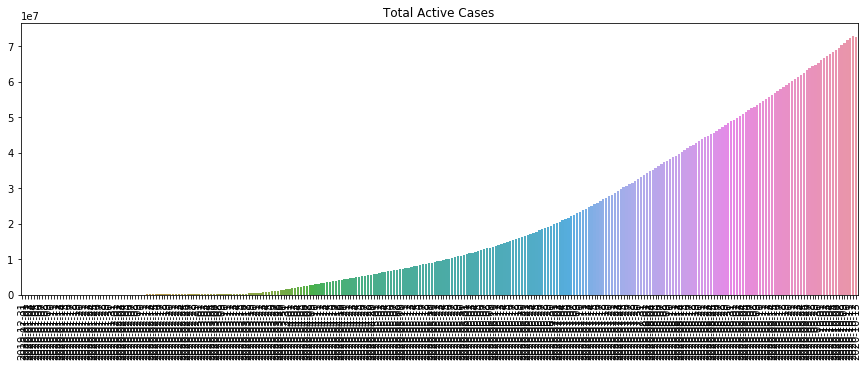

In [110]:
# TOTAL CASES ON FIGURE

# i substracted totalcase, totaldeath and posative to know active cases

plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise['total_cases']-datewise['total_deaths']-datewise['positive_rate'])
plt.title('Total Active Cases')
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

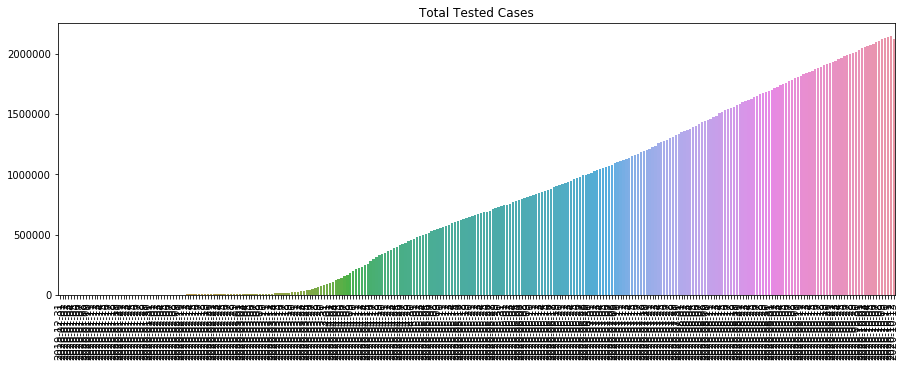

In [111]:
# TOTAL TESTS ON FIGURE

# same procidure as previus stage to know Tested cases

plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise['total_deaths']-datewise['positive_rate'])
plt.title('Total Tested Cases')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Daily Progress Diagram')

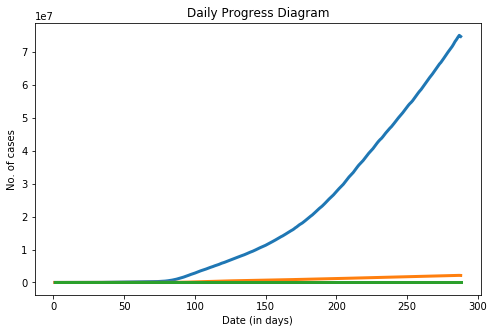

In [112]:
# CREATING CLEAN FIGURE (BY DAY)

# here i compare with totaldeath, totalcase, date and posative to display out the clean figure.
# i have used for loop here to access all the data in that csv file
# similarly i have used data unique to avoid repeatig case
# i have given date 1 for single days of analyzation, it analyse report of every day

datewise['date']=datewise.index.date
date_total=[]
case_total=[]
death_total=[]
positive_total=[]
date=1
for i in list(datewise['date'].unique()):
    case_total.append(datewise[datewise['date']==i]['total_cases'].iloc[-1])
    death_total.append(datewise[datewise['date']==i]['total_deaths'].iloc[-1])
    positive_total.append(datewise[datewise['date']==i]['positive_rate'].iloc[-1])
    date_total.append(date)
    date=date+1
plt.figure(figsize=(8,5))
plt.plot(date_total, case_total, linewidth=3)
plt.plot(date_total, death_total, linewidth=3)
plt.plot(date_total, positive_total, linewidth=3)
plt.xlabel('Date (in days)')
plt.ylabel('No. of cases')
plt.title('Daily Progress Diagram')

Text(0.5, 1.0, 'Daily Report of Deaths Cases')

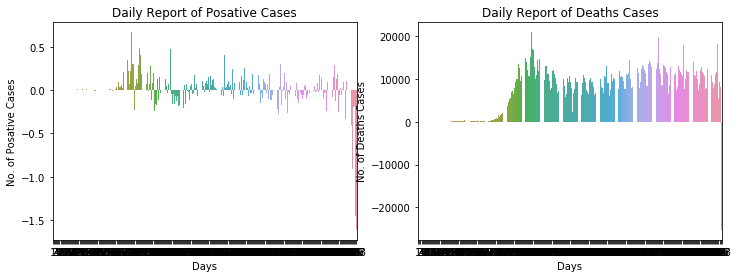

In [113]:
# TOTAL DEATH AND POSITICE CASE IN 2 DIFF FIGURE

# analyzing with two different figure of deaths and posative cases
# i have used previous stage's data here as variable
# ax1 and ax2. ax1 for posative and ax2 for deaths

fig,(ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=date_total, y=pd.Series(positive_total).diff().fillna(0),ax=ax1)
sns.barplot(x=date_total, y=pd.Series(death_total).diff().fillna(0),ax=ax2)
ax1.set_xlabel('Days')
ax1.set_ylabel('No. of Posative Cases')
ax1.set_title('Daily Report of Posative Cases')

ax2.set_xlabel('Days')
ax2.set_ylabel('No. of Deaths Cases')
ax2.set_title('Daily Report of Deaths Cases')

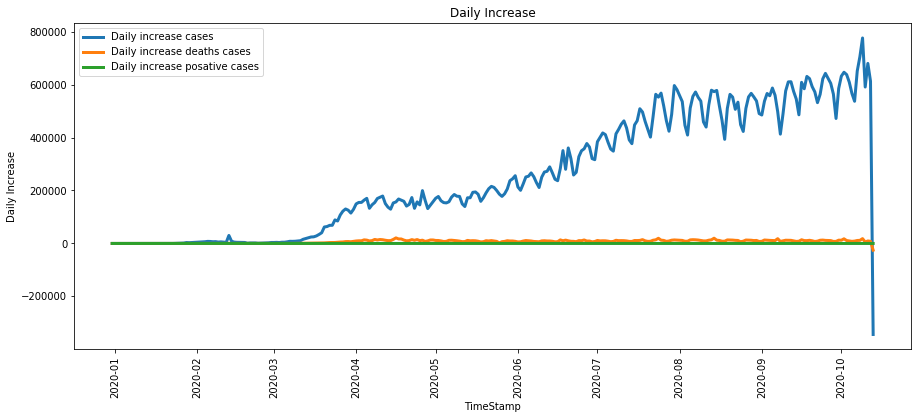

In [114]:
# DAILY INCREASE TIMESTAMP

# here i analyze with timestamp form january to october
# plt is from matplotlib for changes in figure
# fillna(0) to fill NaN as 0 value

plt.figure(figsize=(15,6))
plt.plot(datewise['total_cases'].diff().fillna(0), label='Daily increase cases', linewidth=3)
plt.plot(datewise['total_deaths'].diff().fillna(0), label='Daily increase deaths cases', linewidth=3)
plt.plot(datewise['positive_rate'].diff().fillna(0), label='Daily increase posative cases', linewidth=3)
plt.xlabel('TimeStamp')
plt.ylabel('Daily Increase')
plt.title('Daily Increase')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Continent with Deaths Cases')

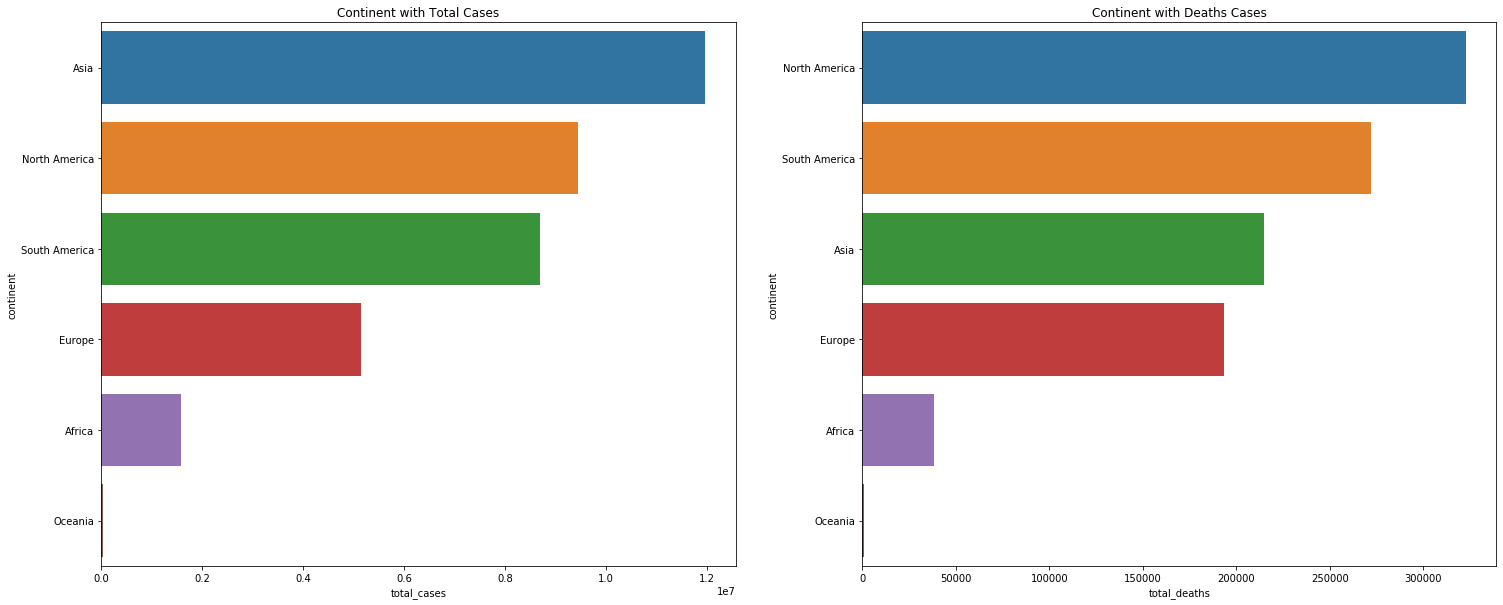

In [115]:
# LETS TRY WITH Continent-WISE

# i have tried here with continent to visualize cases
# here i have define as groupby of continent and aggregate (agg) to pass function in a series
# *100 is for percentage
# which shows asia is the highest and oceania have lowest cases



continentwise = df[df['date']==df['date'].max()].groupby(['continent']).agg({'total_cases':'sum','total_deaths':'sum','positive_rate':'sum'}).sort_values(['total_cases'], ascending=False)
continentwise['death']=(continentwise['total_deaths']/continentwise['positive_rate'])*100
continentwise['posative']=(continentwise['positive_rate']/continentwise['total_cases'])*100

fig,(ax1, ax2) = plt.subplots(1,2,figsize=(25,10))
top_case = continentwise.sort_values(['total_cases'], ascending=False).head(10)
top_death = continentwise.sort_values(['total_deaths'], ascending=False).head(10)

sns.barplot(x=top_case['total_cases'], y=top_case.index, ax=ax1)
sns.barplot(x=top_death['total_deaths'], y=top_death.index, ax=ax2)

ax1.set_title('Continent with Total Cases')
ax2.set_title('Continent with Deaths Cases')

In [116]:
# ANALYZING CASE IN NEPAL

In [117]:
# to analyze cases of nepal i put date as group and aggregare totalcase, death and positive rate of nepal
# and finally it shows total case and total death but sorry for posative rate (this is not a perfect files so..)

nepal = df[df['location']=='Nepal']
datewise_nepal = nepal.groupby(['date']).agg({'total_cases':'sum','total_deaths':'sum','positive_rate':'sum'})
print(datewise_nepal.iloc[-1])

total_cases     111802
total_deaths       645
positive_rate        0
Name: 2020-10-13 00:00:00, dtype: float64


Text(0.5, 1.0, 'Daily Progress Diagram in Nepal')

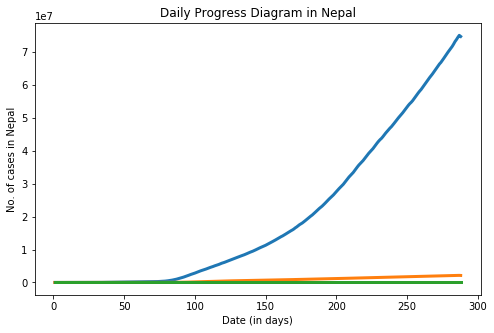

In [118]:
# CREATING CLEAN FIGURE of Nepal (BY DAY)

# same procedure as with world case (i already explain the code up)
# it shows the increasing active case is too higher than deaths

datewise_nepal['date']=datewise.index.date
nepal_date_total=[]
nepal_case_total=[]
nepal_death_total=[]
nepal_positive_total=[]
date=1
for i in list(datewise_nepal['date'].unique()):
    nepal_case_total.append(datewise[datewise_nepal['date']==i]['total_cases'].iloc[-1])
    nepal_death_total.append(datewise[datewise_nepal['date']==i]['total_deaths'].iloc[-1])
    nepal_positive_total.append(datewise[datewise_nepal['date']==i]['positive_rate'].iloc[-1])
    nepal_date_total.append(date)
    date=date+1
plt.figure(figsize=(8,5))
plt.plot(nepal_date_total, nepal_case_total, linewidth=3)
plt.plot(nepal_date_total, nepal_death_total, linewidth=3)
plt.plot(nepal_date_total, nepal_positive_total, linewidth=3)
plt.xlabel('Date (in days)')
plt.ylabel('No. of cases in Nepal')
plt.title('Daily Progress Diagram in Nepal')

In [119]:
# LOOKING INTO OTHERS COUNTRY

#choosing different country with their own data
us= df[df['location']=='United States']
china = df[df['location']=='China']
india = df[df['location']=='India']
japan = df[df['location']=='Japan']

# aggregate the necessay columns through date
datewise_us = us.groupby(['date']).agg({'total_cases':'sum','total_deaths':'sum','positive_rate':'sum'})
datewise_china = china.groupby(['date']).agg({'total_cases':'sum','total_deaths':'sum','positive_rate':'sum'})
datewise_india = india.groupby(['date']).agg({'total_cases':'sum','total_deaths':'sum','positive_rate':'sum'})
datewise_japan = japan.groupby(['date']).agg({'total_cases':'sum','total_deaths':'sum','positive_rate':'sum'})

# getting maximum number of  total  cases with country(unique data)
nepal_total = datewise_nepal['total_cases'].max()
us_total = datewise_us['total_cases'].max()
china_total = datewise_china['total_cases'].max()
india_total = datewise_india['total_cases'].max()
japan_total = datewise_japan['total_cases'].max()

# finally printing the results with custom readable
print('In',datewise_nepal[datewise_nepal['total_cases']>0].shape[0],'days it reach',nepal_total, 'confirm cases in Nepal')
print('In',datewise_us[datewise_us['total_cases']>0].shape[0],'days it reach',us_total, 'confirm cases in US')
print('In',datewise_china[datewise_china['total_cases']>0].shape[0],'days it reach',china_total, ' confirm cases in China')
print('In',datewise_india[datewise_india['total_cases']>0].shape[0],'days it reach',india_total, 'confirm cases in India')
print('In',datewise_japan[datewise_japan['total_cases']>0].shape[0],'days it reach',japan_total, 'confirm cases in Japan')

In 250 days it reach 111802.0 confirm cases in Nepal
In 267 days it reach 7804197.0 confirm cases in US
In 288 days it reach 90830.0  confirm cases in China
In 257 days it reach 7175880.0 confirm cases in India
In 273 days it reach 89673.0 confirm cases in Japan


In [120]:
# FORECASTING PART


In [121]:
# i have used predict here 
# i tried through date
# here need to train and validate data
# shaping data with some validation

datewise['since']=datewise.index-datewise.index[0]
datewise['since']=datewise['since'].dt.days
train_data = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_data = datewise.iloc[:int(datewise.shape[0]*0.95)]
models_scores=[]

In [122]:
# using most useful and common library/models linearRegression and  support vector machine 
# using support vector machine with parameter C as 1, karnel as poly and epsilon and 0.001
# again shaping data with some validation


lr = LinearRegression(normalize=True)
svm = SVR(C=1, degree=5, kernel='poly', epsilon=0.001)
lr.fit(np.array(train_data['since']).reshape(-1,1), np.array(train_data['total_cases']).reshape(-1,1))
svm.fit(np.array(train_data['since']).reshape(-1,1), np.array(train_data['total_cases']).reshape(-1,1))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [123]:
prediction_valid_lr = lr.predict(np.array(valid_data['since']).reshape(-1,1))
prediction_valid_svm = lr.predict(np.array(valid_data['since']).reshape(-1,1))


In [124]:
# PREDICTION THE UPCOMMING DAYS CASE

# now time to predict with array, lambda, float format, dataframe and zip
# where,
#     array for used of many variable,
#     lambda for manage resource, 
#     float_format for decimal values,
#     dataFrame for finding null values,
#     zip for unpacking zipped datasets
# finally our result is displayed with three columns 'Dates', 'Linear Regression' and 'Support Vectors Mechines'

upcomming_date = []
upcomming_prediction_lr = []
upcomming_prediction_svm = []
for i in range(1,18):
    upcomming_date.append(datewise.index[-1]+timedelta(days=i))
    upcomming_prediction_lr.append(lr.predict(np.array(datewise['since'].max()+i).reshape(-1,1))[0][0])
    upcomming_prediction_svm.append(svm.predict(np.array(datewise['since'].max()+i).reshape(-1,1))[0])
pd.set_option('display.float_format', lambda x: '%.f'%x)
model_predictions=pd.DataFrame(zip(upcomming_date,upcomming_prediction_lr,upcomming_prediction_svm), columns=['Dates', 'Linear Regression', 'Support Vectors Mechines'])
model_predictions.head(15)

,Dates,Linear Regression,Support Vectors Mechines
0,2020-10-14,52456047,22640210
1,2020-10-15,52687464,22888105
2,2020-10-16,52918882,23139455
3,2020-10-17,53150300,23394297
4,2020-10-18,53381717,23652665
5,2020-10-19,53613135,23914597
6,2020-10-20,53844553,24180129
7,2020-10-21,54075970,24449299
8,2020-10-22,54307388,24722143
9,2020-10-23,54538806,24998700


In [125]:
# i have used forecast here 


In [126]:
# almost same process here as predic
# train and validate data using shape
# and the main thing i have used holt here to forecast the future data
# fitting with specific function and passing the lenght of valid data in forecast

model_train= datewise.iloc[:int(datewise.shape[0]*0.85)]
valid = datewise.iloc[:int(datewise.shape[0]*0.85)]

holt = Holt(np.asarray(model_train['total_cases'])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred['Holt']=holt.forecast(len(valid))

In [127]:
# finally processing for future data using HOLT
# predic data day by day using loop 
# finally our result is displayed with three columns 'Dates', 'Linear Regression', 'Support Vectors Mechines' and'Holts Prediction'



holt_upcomming_date = []
holt_upcomming_prediction = []
for i in range(1,18):
    holt_upcomming_date.append(datewise.index[-1]+timedelta(days=i))
    holt_upcomming_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions['Holts Prediction']=holt_upcomming_prediction
model_predictions.head(10)

,Dates,Linear Regression,Support Vectors Mechines,Holts Prediction
0,2020-10-14,52456047,22640210,179205565
1,2020-10-15,52687464,22888105,179732674
2,2020-10-16,52918882,23139455,180259783
3,2020-10-17,53150300,23394297,180786893
4,2020-10-18,53381717,23652665,181314002
5,2020-10-19,53613135,23914597,181841112
6,2020-10-20,53844553,24180129,182368221
7,2020-10-21,54075970,24449299,182895331
8,2020-10-22,54307388,24722143,183422440
9,2020-10-23,54538806,24998700,183949549
